In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

In [3]:
PARENTDIR = os.path.dirname(os.getcwd())
PARENTDIR = os.path.dirname(PARENTDIR)
PARENTDIR

'/Users/aswin/AI_for_Patient_Outcomes'

In [5]:
df = pd.read_csv(f"{PARENTDIR}/Dataset/diabetic_data.csv")

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
df.shape

(101766, 50)

In [8]:
df.dtypes
#ideally going to eliminate the filler medications

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [9]:
df['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [10]:
df['admission_type_id']

0         6
1         1
2         1
3         1
4         1
         ..
101761    1
101762    1
101763    1
101764    2
101765    1
Name: admission_type_id, Length: 101766, dtype: int64

In [11]:
df = df[["encounter_id", "race", 
         "gender", "age", "admission_type_id", 
         "discharge_disposition_id", "admission_source_id", "time_in_hospital",
        "num_lab_procedures", "num_medications", "number_outpatient", "number_emergency", "number_diagnoses", "diabetesMed", "readmitted"]]

In [12]:
from sklearn.preprocessing import LabelEncoder

# Assuming your data is stored in a DataFrame called df
le = LabelEncoder()

df["race"] = le.fit_transform(df["race"])
df["gender"] = le.fit_transform(df["gender"])
df["diabetesMed"] = le.fit_transform(df["diabetesMed"])
df["readmitted"] = le.fit_transform(df["readmitted"])


In [13]:
def map_age_range_to_value(age_range):
    age_range_str = str(age_range)  # Convert age_range to a string
    age_range_parts = age_range_str.split('-')  # Split the string at the '-' character
    age_start = int(age_range_parts[0][1:])  # Extract the starting age value from the first part of the split
    age_end = int(age_range_parts[1][:-1])  # Extract the ending age value from the second part of the split
    age_value = ((age_start + age_end) // 2) + 1  # Calculate the average age value and add 1 to get the midpoint of the range
    return age_value
df['age'] = df['age'].apply(map_age_range_to_value)


In [14]:
df.head()

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_outpatient,number_emergency,number_diagnoses,diabetesMed,readmitted
0,2278392,3,0,6,6,25,1,1,41,1,0,0,1,0,2
1,149190,3,0,16,1,1,7,3,59,18,0,0,9,1,1
2,64410,1,0,26,1,1,7,2,11,13,2,0,6,1,2
3,500364,3,1,36,1,1,7,2,44,16,0,0,7,1,2
4,16680,3,1,46,1,1,7,1,51,8,0,0,5,1,2


In [15]:
X = df.drop('readmitted', axis=1)
y = df['readmitted']

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
X_train.value_counts()

encounter_id  race  gender  age  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  num_lab_procedures  num_medications  number_outpatient  number_emergency  number_diagnoses  diabetesMed
15738         3     0       96   3                  3                         4                    12                33                  18               0                  0                 8                 1              1
190965882     3     0       66   1                  2                         7                    1                 32                  9                1                  0                 9                 1              1
190987356     3     1       46   1                  1                         7                    3                 45                  7                0                  0                 5                 1              1
190978170     4     1       86   1                  6                         7                    2 

In [18]:
def create_pairs(X, y, max_pairs_per_sample=10):
    positive_pairs = []
    negative_pairs = []
    
    for i in range(len(X)):
        positive_count = 0
        negative_count = 0
        for j in np.random.permutation(len(X)):
            if i != j:
                if y[i] == y[j] and positive_count < max_pairs_per_sample:
                    positive_pairs.append((X[i], X[j], 1))
                    positive_count += 1
                elif y[i] != y[j] and negative_count < max_pairs_per_sample:
                    negative_pairs.append((X[i], X[j], 0))
                    negative_count += 1
                    
            if positive_count >= max_pairs_per_sample and negative_count >= max_pairs_per_sample:
                break
                
    return positive_pairs, negative_pairs

positive_pairs, negative_pairs = create_pairs(X_train.values, y_train.values, max_pairs_per_sample=5)
pairs = positive_pairs + negative_pairs
np.random.shuffle(pairs)


In [19]:
pair1 = np.array([p[0] for p in pairs])
pair2 = np.array([p[1] for p in pairs])
labels = np.array([p[2] for p in pairs])

In [20]:
def create_contrastive_model(input_shape):
    base_input = tf.keras.layers.Input(input_shape)
    x = tf.keras.layers.Dense(128, activation='relu')(base_input)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    encoded = tf.keras.layers.Dense(16)(x)
    
    return tf.keras.models.Model(inputs=base_input, outputs=encoded)

In [21]:
input_shape = X_train.shape[1]
base_network = create_contrastive_model(input_shape)

input_a = tf.keras.layers.Input(shape=input_shape)
input_b = tf.keras.layers.Input(shape=input_shape)

processed_a = base_network(input_a)
processed_b = base_network(input_b)
distance = tf.keras.layers.Lambda(lambda tensors: tf.abs(tensors[0] - tensors[1]))([processed_a, processed_b])

model = tf.keras.models.Model([input_a, input_b], distance)

In [26]:
def contrastive_loss(y_true, y_pred, margin=1.0):
    y_true = tf.cast(y_true, tf.float32)
    square_pred = tf.square(y_pred)
    margin_square = tf.square(tf.maximum(margin - y_pred, 0))
    return tf.reduce_mean(y_true * square_pred + (1 - y_true) * margin_square)

def contrastive_accuracy(y_true, y_pred, threshold=0.5):
    y_pred_class = tf.cast(y_pred < threshold, tf.float32)
    return tf.keras.metrics.binary_accuracy(y_true, y_pred_class)


In [27]:
model.compile(optimizer='adam', loss=contrastive_loss, metrics=[contrastive_accuracy])
history = model.fit([pair1, pair2], labels, epochs=10, batch_size=32)

Epoch 1/10
25442/25442 [==============================] - 17s 657us/step - loss: 3183758848.0000 - contrastive_accuracy: 0.4997
Epoch 2/10
25442/25442 [==============================] - 16s 639us/step - loss: 0.5000 - contrastive_accuracy: 0.5000
Epoch 3/10
25442/25442 [==============================] - 17s 649us/step - loss: 0.5000 - contrastive_accuracy: 0.5000
Epoch 4/10
25442/25442 [==============================] - 16s 645us/step - loss: 0.5000 - contrastive_accuracy: 0.5000
Epoch 5/10
25442/25442 [==============================] - 16s 642us/step - loss: 0.5000 - contrastive_accuracy: 0.5000
Epoch 6/10
25442/25442 [==============================] - 16s 643us/step - loss: 0.5000 - contrastive_accuracy: 0.5000
Epoch 7/10
25442/25442 [==============================] - 16s 642us/step - loss: 0.5000 - contrastive_accuracy: 0.5000
Epoch 8/10
25442/25442 [==============================] - 16s 643us/step - loss: 0.5000 - contrastive_accuracy: 0.5000
Epoch 9/10
25442/25442 [===============

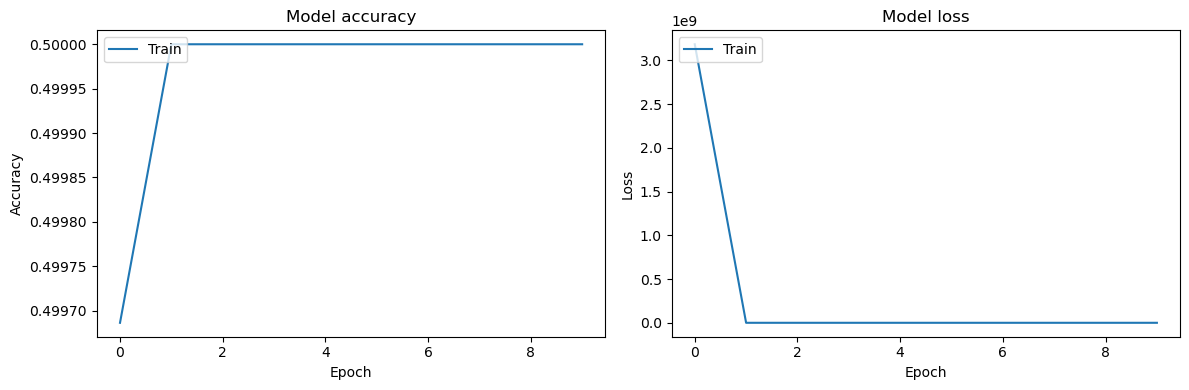

In [28]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['contrastive_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.tight_layout()
plt.show()


In [29]:
import shap
embeddings = base_network.predict(X_train)
classifier = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(embeddings, y_train, epochs=10, batch_size=32)

   1/2545 [..............................] - ETA: 1:58

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


2545/2545 [==============================] - 1s 311us/step
Epoch 1/10
2545/2545 [==============================] - 1s 485us/step - loss: -0.1788 - accuracy: 0.3491
Epoch 2/10
2545/2545 [==============================] - 1s 478us/step - loss: -1.3786 - accuracy: 0.3492
Epoch 3/10
2545/2545 [==============================] - 1s 474us/step - loss: -2.3995 - accuracy: 0.3492
Epoch 4/10
2545/2545 [==============================] - 1s 477us/step - loss: -3.4375 - accuracy: 0.3492
Epoch 5/10
2545/2545 [==============================] - 1s 462us/step - loss: -4.4828 - accuracy: 0.3492
Epoch 6/10
2545/2545 [==============================] - 1s 475us/step - loss: -5.5327 - accuracy: 0.3492
Epoch 7/10
2545/2545 [==============================] - 1s 466us/step - loss: -6.5816 - accuracy: 0.3492
Epoch 8/10
2545/2545 [==============================] - 1s 490us/step - loss: -7.6282 - accuracy: 0.3492
Epoch 9/10
2545/2545 [==============================] - 1s 490us/step - loss: -8.6778 - accuracy: 0.3

In [30]:
explainer = shap.DeepExplainer(classifier, embeddings)
shap_values = explainer.shap_values(embeddings)
shap.initjs()
shap.force_plot(explainer.expected_value[0].numpy(), shap_values[0][0], embeddings[0])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>]. Consider rewriting this model with the Functional API.


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


KeyboardInterrupt: 